## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.regularizers import l2

drp_ratio = 0.1

def build_mlp(input_shape, ratio, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    """Code Here
    建立你的神經網路
    """
    
    for i, n_units in enumerate(num_neurons):
        
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1),
                                  kernel_regularizer=l2(ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
        
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1),
                                  kernel_regularizer=l2(ratio))(x)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_RATIO = [0.0001,1e-8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for re_ratio in L2_RATIO:
    
    keras.backend.clear_session()
    
    model = build_mlp(input_shape=x_train.shape[1:], ratio=re_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp = "drp=0.1, l2_ratio=" + str(re_ratio)
    results[exp] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}   


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024

50000/50000 [==============================] - 9s 178us/step - loss: 1.2518 - accuracy: 0.5961 - val_loss: 1.5169 - val_accuracy: 0.5138
Epoch 44/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.2547 - accuracy: 0.5960 - val_loss: 1.5496 - val_accuracy: 0.5023
Epoch 45/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.2551 - accuracy: 0.5966 - val_loss: 1.5123 - val_accuracy: 0.5222
Epoch 46/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.2539 - accuracy: 0.5964 - val_loss: 1.5022 - val_accuracy: 0.5230
Epoch 47/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.2450 - accuracy: 0.5960 - val_loss: 1.4889 - val_accuracy: 0.5275
Epoch 48/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.2282 - accuracy: 0.6054 - val_loss: 1.5077 - val_accuracy: 0.5157
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.2184 - accuracy: 0.6098 - val_loss

50000/50000 [==============================] - 9s 189us/step - loss: 1.2010 - accuracy: 0.5690 - val_loss: 1.4027 - val_accuracy: 0.5059
Epoch 36/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.1821 - accuracy: 0.5765 - val_loss: 1.3555 - val_accuracy: 0.5248
Epoch 37/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.1755 - accuracy: 0.5799 - val_loss: 1.3824 - val_accuracy: 0.5107
Epoch 38/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.1644 - accuracy: 0.5814 - val_loss: 1.4223 - val_accuracy: 0.5009
Epoch 39/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.1573 - accuracy: 0.5873 - val_loss: 1.3638 - val_accuracy: 0.5171
Epoch 40/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.1535 - accuracy: 0.5848 - val_loss: 1.3405 - val_accuracy: 0.5335
Epoch 41/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.1543 - accuracy: 0.5870 - val_loss

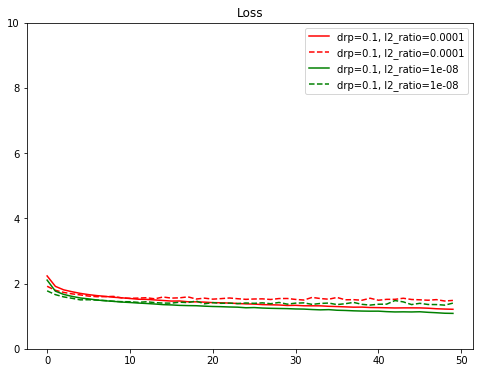

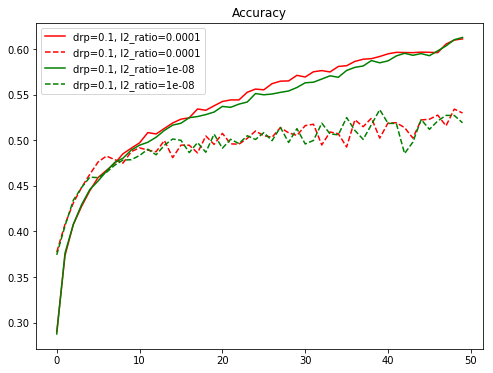

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 10])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()